In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
import sys
import os
from scipy.stats import linregress
from pprint import pprint
sys.path.append('../')
from api_keys import sportsio_key
print(sportsio_key)

fd22e44264ab4828a2cfe860923da7f0


In [130]:
#Import the rating and salary files

#Player Stats
stats_df = pd.read_csv('Resources/100_stats.csv')

#Player Salaries
salaries_dict= pd.read_excel('Resources/population_salaries_by_season.xlsx',sheet_name=None)


In [131]:
#Convert dict to a data frame

salaries_df=pd.DataFrame(salaries_dict["salaries"])


In [132]:
salaries_df.head()

,career_Y,Tom Brady,Drew Brees,Ben Roethlisberger,Philip Rivers,Eli Manning,Matt Ryan,Aaron Rodgers,Mathew Stafford,Carson Palmer,...,Curtis Painter,Sean Mannion,Tom Savage,Marques Tuiasosopo,Pat White,Bryce Petty,Ryan Lindley,Spergon Wynn,John Beck,Drew Henson
0,Y1,205833,627500.0,1502000.0,2580000.0,2244000.0,6600000.0,1150000.0,3100000.0,2500000.0,...,630000.0,591449.0,495146.0,NaN,NaN,573424.0,416327.0,NaN,175000.0,NaN
1,Y2,310833,707500.0,4220250.0,4855000.0,4527926.0,9900000.0,1402500.0,12980000.0,5477242.0,...,NaN,738734.0,408146.0,NaN,NaN,663424.0,506327.0,NaN,NaN,NaN
2,Y3,1087834,2287500.0,4545750.0,5165000.0,7388074.0,12250000.0,1557500.0,6123750.0,8982758.0,...,NaN,886486.0,675146.0,NaN,NaN,753424.0,234706.0,NaN,NaN,NaN
3,Y4,3318750,2367500.0,3127000.0,10775000.0,10046666.0,13250000.0,13952500.0,8935000.0,12980000.0,...,NaN,1034227.0,765146.0,NaN,NaN,NaN,38824.0,NaN,NaN,NaN
4,Y5,5058750,8078000.0,7970000.0,7625000.0,12916666.0,13500000.0,9652500.0,17820000.0,13480000.0,...,NaN,735000.0,207353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# Changed the rows//columns so columns represent year and rows are Player name
salaries1_df=salaries_df.transpose()

In [134]:
salaries1_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
career_Y,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20,Y21
Tom Brady,205833,310833,1087834,3318750,5058750,8423750,13823750,7340000,14620000,14620000,...,13200000,8000000,13800000,14800000,14000000,13764706,14000000,22000000,21500000,25000000
Drew Brees,627500.0,707500.0,2287500.0,2367500.0,8078000.0,6000000.0,7000000.0,9000000.0,10660400.0,12358400.0,...,10400000.0,17400000.0,18400000.0,23800000.0,17250000.0,19000000.0,24000000.0,22700000.0,23650000.0,NaN
Ben Roethlisberger,1502000.0,4220250.0,4545750.0,3127000.0,7970000.0,13220000.0,10355882.0,11320000.0,8895000.0,13595000.0,...,17245000.0,23950000.0,18200000.0,23200000.0,26200000.0,23750000.0,NaN,NaN,NaN,NaN
Philip Rivers,2580000.0,4855000.0,5165000.0,10775000.0,7625000.0,11535000.0,11710000.0,13510000.0,15310000.0,13776666.0,...,21166668.0,16500000.0,18000000.0,22000000.0,23000000.0,25000000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bryce Petty,573424.0,663424.0,753424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryan Lindley,416327.0,506327.0,234706.0,38824.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spergon Wynn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
John Beck,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#Drop the first row since it is not relevant. We assume the first data is when they first started to play
salaries1_df=salaries1_df.iloc[1:,:]

In [136]:
salaries1_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Tom Brady,205833,310833,1087834,3318750,5058750,8423750,13823750,7340000,14620000,14620000,...,13200000,8000000,13800000,14800000,14000000,13764706,14000000,22000000,21500000,25000000
Drew Brees,627500.0,707500.0,2287500.0,2367500.0,8078000.0,6000000.0,7000000.0,9000000.0,10660400.0,12358400.0,...,10400000.0,17400000.0,18400000.0,23800000.0,17250000.0,19000000.0,24000000.0,22700000.0,23650000.0,NaN
Ben Roethlisberger,1502000.0,4220250.0,4545750.0,3127000.0,7970000.0,13220000.0,10355882.0,11320000.0,8895000.0,13595000.0,...,17245000.0,23950000.0,18200000.0,23200000.0,26200000.0,23750000.0,NaN,NaN,NaN,NaN
Philip Rivers,2580000.0,4855000.0,5165000.0,10775000.0,7625000.0,11535000.0,11710000.0,13510000.0,15310000.0,13776666.0,...,21166668.0,16500000.0,18000000.0,22000000.0,23000000.0,25000000.0,NaN,NaN,NaN,NaN
Eli Manning,2244000.0,4527926.0,7388074.0,10046666.0,12916666.0,13066668.0,12100000.0,14100000.0,9600000.0,20850000.0,...,14450000.0,24200000.0,19700000.0,22200000.0,23200000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bryce Petty,573424.0,663424.0,753424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryan Lindley,416327.0,506327.0,234706.0,38824.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spergon Wynn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
John Beck,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
stats_df

,Player,season_year,Tm,Age,Pos,G,GS,Wins,Losses,Ties,...,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,QBR
0,Spergon Wynn,2000,CLE,22,QB,7,1,0,1,0,...,23.9,41.2,13.0,89,19.4,1.16,0.49,NaN,NaN,NaN
1,Chad Pennington,2000,NYJ,24,QB,1,0,0,0,0,...,67.0,127.1,1.0,4,16.7,10.50,13.83,NaN,NaN,NaN
2,Chris Redman,2000,BAL,23,QB,2,0,0,0,0,...,9.5,84.0,0.0,0,0.0,6.33,6.33,NaN,NaN,NaN
3,Tom Brady,2000,NWE,23,QB,1,0,0,0,0,...,6.0,42.4,0.0,0,0.0,2.00,2.00,NaN,NaN,NaN
4,Tim Rattay,2000,SFO,23,QB,1,0,0,0,0,...,-4.0,79.2,0.0,0,0.0,-4.00,-4.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Matthew Stafford,2020,DET,32,QB,16,16,5,11,0,...,255.3,96.3,38.0,254,6.7,6.77,6.89,3.0,4.0,61.3
718,Ben Roethlisberger,2020,PIT,38,QB,15,15,12,3,0,...,253.5,94.1,13.0,118,2.1,5.93,6.27,4.0,4.0,52.5
719,Drew Brees,2020,NOR,41,QB,12,12,9,3,0,...,245.2,106.4,13.0,89,3.2,7.08,7.60,1.0,3.0,68.3
720,Ryan Fitzpatrick,2020,MIA,38,QB,9,7,4,3,0,...,232.3,95.6,14.0,65,5.0,7.21,6.85,1.0,1.0,70.9


In [138]:
#Reset Index so we have Player names as one of the column. This may not be needed?
salaries1_df=salaries1_df.reset_index()


In [139]:
#Changed Index to Player
salaries1_df=salaries1_df.rename(columns={"index": "Player"})
salaries1_df

,Player,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,Tom Brady,205833,310833,1087834,3318750,5058750,8423750,13823750,7340000,14620000,...,13200000,8000000,13800000,14800000,14000000,13764706,14000000,22000000,21500000,25000000
1,Drew Brees,627500.0,707500.0,2287500.0,2367500.0,8078000.0,6000000.0,7000000.0,9000000.0,10660400.0,...,10400000.0,17400000.0,18400000.0,23800000.0,17250000.0,19000000.0,24000000.0,22700000.0,23650000.0,NaN
2,Ben Roethlisberger,1502000.0,4220250.0,4545750.0,3127000.0,7970000.0,13220000.0,10355882.0,11320000.0,8895000.0,...,17245000.0,23950000.0,18200000.0,23200000.0,26200000.0,23750000.0,NaN,NaN,NaN,NaN
3,Philip Rivers,2580000.0,4855000.0,5165000.0,10775000.0,7625000.0,11535000.0,11710000.0,13510000.0,15310000.0,...,21166668.0,16500000.0,18000000.0,22000000.0,23000000.0,25000000.0,NaN,NaN,NaN,NaN
4,Eli Manning,2244000.0,4527926.0,7388074.0,10046666.0,12916666.0,13066668.0,12100000.0,14100000.0,9600000.0,...,14450000.0,24200000.0,19700000.0,22200000.0,23200000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bryce Petty,573424.0,663424.0,753424.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Ryan Lindley,416327.0,506327.0,234706.0,38824.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Spergon Wynn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,John Beck,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#merged_df= pd.merge(salaries1_df, stats_df, on="Player",how="left")

#salaries1_df

#series = salaries1_df.iloc[0,2:]

In [141]:
#Sort the stats by Seaon year so they are in ascending order, which should align with the salary table
stats_df=stats_df.sort_values(by=['season_year'])

#ADD a new column called Salary
stats_df["Salary"]=""

# g = stats_df["Player"].unique()
#g

In [142]:
#len(stats_df1.loc[stats_df1['Player'] == g[0]])
#Loop through the 100 players and copy theiur salaries to the stats table oin "Salary column"
#It is not clean way to do things. Will explore more ways to improve it later
i=1
#First row is title
j=0
for player in salaries1_df.iloc[0:,0]:
    i=1
    for row in stats_df.loc[stats_df['Player'] == player].index:
#Debugging only
#        print (f"Player = {player}")
#        print(f"row = {row}")
#        print(f"i={i}")
#        print(f"Salaries = {salaries1_df.iloc[0,i]}")
#        print(f"Stats value = {stats_df.loc[row , 'Salary']}")
#        salary=salaries1_df.iloc[j,i]
        stats_df.loc[row , "Salary"] = salaries1_df.iloc[j ,i]
        i=i+1
    j=j+1


In [143]:

#i=0
#for row in stats_df1.loc[stats_df1['Player'] == "Tom Brady"].index:
#    print(row)
#    print(i)
#    stats_df1.loc[row , "Salary"] = salaries_df2.iloc[0,i]
#    i=i+1

In [145]:
stats_df

,Player,season_year,Tm,Age,Pos,G,GS,Wins,Losses,Ties,...,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,QBR,Salary
0,Spergon Wynn,2000,CLE,22,QB,7,1,0,1,0,...,41.2,13.0,89,19.4,1.16,0.49,NaN,NaN,NaN,NaN
1,Chad Pennington,2000,NYJ,24,QB,1,0,0,0,0,...,127.1,1.0,4,16.7,10.50,13.83,NaN,NaN,NaN,1122477.0
2,Chris Redman,2000,BAL,23,QB,2,0,0,0,0,...,84.0,0.0,0,0.0,6.33,6.33,NaN,NaN,NaN,298000.0
3,Tom Brady,2000,NWE,23,QB,1,0,0,0,0,...,42.4,0.0,0,0.0,2.00,2.00,NaN,NaN,NaN,205833
4,Tim Rattay,2000,SFO,23,QB,1,0,0,0,0,...,79.2,0.0,0,0.0,-4.00,-4.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Chad Henne,2020,KAN,35,QB,3,1,0,1,0,...,108.2,2.0,4,5.0,6.10,7.10,NaN,NaN,26.3,3500000.0
256,Joe Flacco,2020,NYJ,35,QB,5,4,0,4,0,...,80.6,7.0,69,5.0,5.64,5.53,NaN,NaN,50.3,1562500.0
255,Mike Glennon,2020,JAX,31,QB,5,5,0,5,0,...,80.1,9.0,53,4.8,5.42,4.97,NaN,NaN,29.8,1865625.0
338,Tyrod Taylor,2020,LAC,31,QB,2,1,1,0,0,...,75.4,2.0,1,6.3,6.47,6.47,1.0,1.0,16.6,3500000.0


In [149]:
#plot salary per player
player_group=stats_df.groupby("Player")
years_played=player_group["Player"].count()
years_played

Player
A.J. Feeley           6
A.J. McCarron         5
Aaron Rodgers        16
Alex Smith           14
Andrew Luck           6
                     ..
Troy Smith            4
Tyler Thigpen         6
Tyrod Taylor          9
Vince Young           6
Zach Mettenberger     2
Name: Player, Length: 99, dtype: int64

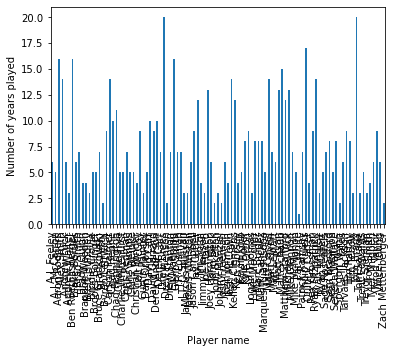

<Figure size 432x288 with 0 Axes>

In [150]:
#Number of years played per Player

years_chart = years_played.plot(kind='bar')

# Set the xlabel and ylabel using class methods
years_chart.set_xlabel("Player name")
years_chart.set_ylabel("Number of years played")
plt.show()
plt.tight_layout()

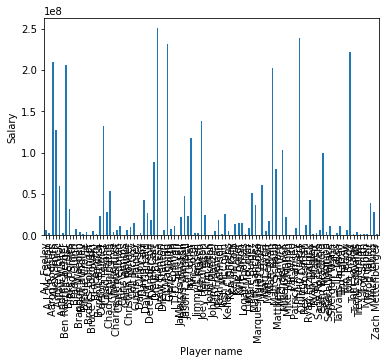

<Figure size 432x288 with 0 Axes>

In [187]:
#Money made per player
Salary=player_group["Salary"].sum()
Salary= Salary.fillna(0)
Salary = pd.to_numeric(Salary)
len(Salary)
len(years_played)
Salary_ave=Salary.div(pd.to_numeric(years_played))


salary_chart = Salary.plot(kind='bar')

# Set the xlabel and ylabel using class methods
salary_chart.set_xlabel("Player name")
salary_chart.set_ylabel("Salary")
plt.show()
plt.tight_layout()

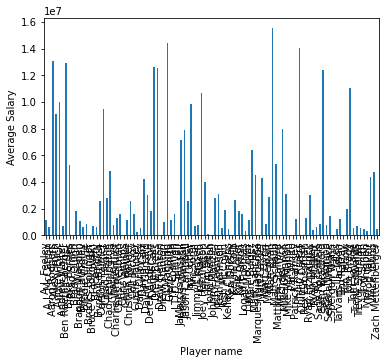

<Figure size 432x288 with 0 Axes>

In [188]:
Salary_ave=Salary.div(pd.to_numeric(years_played))


salary_ave_chart = Salary_ave.plot(kind='bar')

#Set the xlabel and ylabel using class methods
salary_ave_chart.set_xlabel("Player name")
salary_ave_chart.set_ylabel("Average Salary")
plt.show()
plt.tight_layout()

In [160]:
Salary[0]

6713913.0